In [ ]:
# !conda install -c conda-forge pandas

In [ ]:
# ! pip install pandas

Khi làm việc với dữ liệu dạng bảng, chẳng hạn như dữ liệu được lưu trữ trong bảng tính hoặc cơ sở dữ liệu, pandas là công cụ phù hợp với bạn. pandas sẽ giúp bạn khám phá, dọn dẹp và xử lý dữ liệu của mình. Trong pandas, bảng dữ liệu được gọi là DataFrame .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# 1. Cấu trúc dữ liệu trong pandas
Pandas có 2 cấu trúc dữ liệu cơ bản:

## 1.1. Series
là mảng được gắn nhãn một chiều có khả năng chứa bất kỳ loại dữ liệu nào (số nguyên, chuỗi, số dấu phẩy động, đối tượng Python, v.v.). Các nhãn trục được gọi chung là chỉ mục . Phương pháp cơ bản để tạo Series là gọi:
```
  s = pd.Series(data, index=index)
```
Ở đây, data có thể có nhiều thứ khác nhau:
- một lệnh Python
- một mảng
- một giá trị vô hướng



### From ndarray

In [3]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    1.511676
b    1.047859
c   -0.045781
d   -0.297726
e    0.539701
dtype: float64

In [4]:
s2 = pd.Series(np.random.randn(5))
s2

0    0.869281
1    1.215907
2   -0.684237
3   -0.672926
4   -0.093480
dtype: float64

### From dict

In [ ]:
d = {"a": 1,
     "b": 2,
     "c": 3}
pd.Series(d, index=["b", "c", "d", "a"])

In [7]:
s = pd.Series(np.random.randn(10))
s

0    1.048527
1    1.677290
2   -0.606554
3    0.562188
4    1.450674
5   -0.836639
6    0.523162
7    1.470932
8    0.620084
9   -1.631237
dtype: float64

In [8]:
print(s.iloc[0])
print(s.loc[:3])
print(s.iloc[[4, 3, 0]])
print(np.exp(s))

1.0485266367149937
0    1.048527
1    1.677290
2   -0.606554
3    0.562188
dtype: float64
4    1.450674
3    0.562188
0    1.048527
dtype: float64
0    2.853444
1    5.351034
2    0.545226
3    1.754507
4    4.265990
5    0.433164
6    1.687355
7    4.353289
8    1.859084
9    0.195687
dtype: float64


Series hoạt động rất giống với ndarray và là đối số hợp lệ cho hầu hết các hàm NumPy. Tuy nhiên, nếu cần một ndarray thực tế, ta vẫn có thể chuyển nó bằng cách:
```
  s.to_numpy()
```
Tương tư, nó cũng hoạt động như một dict.

## 1.2. DataFrame
là một cấu trúc dữ liệu dạng bảng với các cột có thể chứa dữ liệu của mọi loại. DataFrame có các chỉ mục hàng và cột; nó có thể được xem như một từ điển của Series (tất cả chia sẻ cùng một chỉ mục).
### From dict of Series or dicts

In [9]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [10]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [11]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [12]:
display(df.index)
display(df.columns)

Index(['a', 'b', 'c', 'd'], dtype='object')

Index(['one', 'two'], dtype='object')

### From file
pandas hỗ trợ tích hợp với nhiều định dạng tệp hoặc nguồn dữ liệu sẵn có (csv, excel, sql, json, parquet,…). Việc nhập dữ liệu từ mỗi nguồn dữ liệu này được cung cấp theo chức năng có tiền tố ```read_*``` . Tương tự, các phương thức ```to_*``` được sử dụng để lưu trữ dữ liệu.

Set hiển thị số dòng và cột, chi tiết <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html"><strong>tại đây</strong></a>.

In [17]:
pd.set_option('display.max_colwidth', 40)
pd.set_option('display.precision', 5)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [19]:
drug_900 = pd.read_csv(r"data/drug_900.csv", sep=",", header=0, index_col=None)#, usecols=[0, 1, 2, 4, 5, 6, 7, 8, 9, 10])
drug_900

,cid,cmpdname,cmpdsynonym,mw,mf,...,aids,cidcdate,sidsrcname,depcatg,annotation
0,49,3-Methyl-2-oxobutanoic acid,3-Methyl-2-oxobutanoic acid|759-05-7...,116.110,C5H8O3,...,144506|144507|681123|681140|681605,20040916,001Chemical|10X CHEM|3B Scientific (...,Chemical Vendors|Curation Efforts|Go...,NaN
1,51,2-Oxoglutaric acid,2-ketoglutaric acid|2-Oxopentanedioi...,146.100,C5H6O5,...,1|3|5|7|9|13|15|19|21|23|25|29|31|33...,20040916,001Chemical|10X CHEM|1st Scientific|...,Chemical Vendors|Curation Efforts|Go...,NaN
2,66,"2,5-Dichlorophenol","2,5-dichlorophenol|583-78-8|Phenol, ...",163.000,C6H4Cl2O,...,155|157|161|165|167|175|248|421|426|...,20040916,001Chemical|10X CHEM|1st Scientific|...,Chemical Vendors|Curation Efforts|Go...,NaN
3,70,4-Methyl-2-oxopentanoic acid,4-methyl-2-oxopentanoic acid|816-66-...,130.139,C6H10O3,...,144506|144507|679841|681123|681140|6...,20040916,001Chemical|10X CHEM|3B Scientific (...,Chemical Vendors|Curation Efforts|Go...,NaN
4,71,2-Oxoadipic acid,2-Oxoadipic acid|2-Oxohexanedioic ac...,160.120,C6H8O5,...,NaN,20040916,001Chemical|10X CHEM|A2B Chem|AA BLO...,Chemical Vendors|Curation Efforts|Go...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902,135501639,"N,N-Dimethylguanosine","N,N-Dimethylguanosine|2140-67-2|N2,N...",311.290,C12H17N5O5,...,NaN,20190115,001Chemical|10X CHEM|3B Scientific (...,Chemical Vendors|Curation Efforts|Go...,NaN
903,137319715,"4H-Imidazol-4-one, 2-amino-1,5-dihyd...",2-amino-1-methylimidazolin-4-one|2-a...,113.120,C4H7N3O,...,2517|588834|651631|651632|651633|651...,20190128,001Chemical|10X CHEM|3WAY PHARM INC|...,Chemical Vendors|Curation Efforts|Go...,NaN
904,145453469,(3S)-3-[(3-hydroxypentanoyl)oxy]-4-(...,Hydroxyvalerylcarnitine|3-hydroxyval...,261.310,C12H23NO5,...,NaN,20191212,Human Metabolome Database (HMDB)|Met...,Curation Efforts|NIH Initiatives|Res...,NaN
905,145994596,"3,8,13,18-tetramethyl-2,7,12,17-Porp...","DB03727|HY-113318|CS-0059584|3,8,13,...",654.700,C36H38N4O8,...,NaN,20200307,AbaChemScene|DrugBank|Human Metabolo...,Chemical Vendors|Curation Efforts|Re...,NaN


In [ ]:
display(drug_900)

exactmass: khối lượng chính xác của phân tử

In [20]:
drug_900.info()
drug_900.dtypes
# Thống kê mô tả dữ liệu
drug_900.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cid                     907 non-null    int64  
 1   cmpdname                907 non-null    object 
 2   cmpdsynonym             906 non-null    object 
 3   mw                      907 non-null    float64
 4   mf                      907 non-null    object 
 5   polararea               907 non-null    float64
 6   complexity              907 non-null    float64
 7   xlogp                   885 non-null    float64
 8   heavycnt                907 non-null    int64  
 9   hbonddonor              907 non-null    int64  
 10  hbondacc                907 non-null    int64  
 11  rotbonds                907 non-null    int64  
 12  inchi                   907 non-null    object 
 13  isosmiles               907 non-null    object 
 14  canonicalsmiles         907 non-null    ob

,cid,mw,polararea,complexity,xlogp,...,pclidcnt,gpidcnt,gpfamilycnt,annothitcnt,cidcdate
count,9.07000e+02,907.00000,907.00000,907.00000,885.00000,...,907.00000,9.07000e+02,907.00000,907.0000,9.07000e+02
mean,2.50340e+07,464.37952,92.93363,599.25336,6.01322,...,11845.42889,2.98336e+04,12231.33407,11.6935,2.00752e+07
std,3.11042e+07,311.40514,55.34239,464.57326,7.13541,...,38503.83103,7.96226e+04,38072.50521,4.2888,3.66309e+04
min,4.90000e+01,17.03100,0.00000,0.00000,-9.10000,...,1.00000,0.00000e+00,0.00000,2.0000,2.00409e+07
25%,1.15220e+04,163.00000,63.35000,151.00000,-0.50000,...,26.00000,0.00000e+00,0.00000,8.0000,2.00409e+07
50%,5.28112e+06,354.50000,94.10000,504.00000,3.90000,...,107.00000,3.33000e+02,128.00000,11.0000,2.00508e+07
75%,5.29238e+07,780.10000,111.00000,1020.00000,13.10000,...,3617.50000,2.28680e+04,7517.50000,16.0000,2.01106e+07
max,1.56908e+08,1356.40000,544.00000,3220.00000,19.40000,...,541692.00000,1.19801e+06,721748.00000,20.0000,2.02111e+07


## 2. Thao tác với dataframe

In [21]:
# Lựa chọn 5 dòng từ 5 đến 10 và 3 cột cuối
drug_900.iloc[5:10, -3:]

,sidsrcname,depcatg,annotation
5,001Chemical|10X CHEM|3B Scientific (...,Chemical Vendors|Curation Efforts|Go...,NaN
6,001Chemical|10X CHEM|3B Scientific (...,Chemical Vendors|Curation Efforts|Go...,NaN
7,001Chemical|10X CHEM|3B Scientific (...,Chemical Vendors|Curation Efforts|Go...,D018377 - Neurotransmitter Agents > ...
8,001Chemical|10X CHEM|1st Scientific|...,Chemical Vendors|Curation Efforts|Go...,NaN
9,001Chemical|1st Scientific|3B Scient...,Chemical Vendors|Curation Efforts|Go...,D009676 - Noxae > D002273 - Carcinogens


In [22]:
# Lựa chọn 5 dòng đầu tiên và 4 cột  cid	cmpdname  mf	iupacname
drug_900[["cid", "cmpdname", "mf", "iupacname"]].iloc[:5]

,cid,cmpdname,mf,iupacname
0,49,3-Methyl-2-oxobutanoic acid,C5H8O3,3-methyl-2-oxobutanoic acid
1,51,2-Oxoglutaric acid,C5H6O5,2-oxopentanedioic acid
2,66,"2,5-Dichlorophenol",C6H4Cl2O,"2,5-dichlorophenol"
3,70,4-Methyl-2-oxopentanoic acid,C6H10O3,4-methyl-2-oxopentanoic acid
4,71,2-Oxoadipic acid,C6H8O5,2-oxohexanedioic acid


In [23]:
drug_900.loc[drug_900["cid"] < 100, ["cid", "cmpdname", "mf", "iupacname"]]

,cid,cmpdname,mf,iupacname
0,49,3-Methyl-2-oxobutanoic acid,C5H8O3,3-methyl-2-oxobutanoic acid
1,51,2-Oxoglutaric acid,C5H6O5,2-oxopentanedioic acid
2,66,"2,5-Dichlorophenol",C6H4Cl2O,"2,5-dichlorophenol"
3,70,4-Methyl-2-oxopentanoic acid,C6H10O3,4-methyl-2-oxopentanoic acid
4,71,2-Oxoadipic acid,C6H8O5,2-oxohexanedioic acid
5,96,Acetoacetic acid,C4H6O3,3-oxobutanoic acid


In [24]:
drug_900.filter(regex="name*", axis=1)

,cmpdname,iupacname,sidsrcname
0,3-Methyl-2-oxobutanoic acid,3-methyl-2-oxobutanoic acid,001Chemical|10X CHEM|3B Scientific (...
1,2-Oxoglutaric acid,2-oxopentanedioic acid,001Chemical|10X CHEM|1st Scientific|...
2,"2,5-Dichlorophenol","2,5-dichlorophenol",001Chemical|10X CHEM|1st Scientific|...
3,4-Methyl-2-oxopentanoic acid,4-methyl-2-oxopentanoic acid,001Chemical|10X CHEM|3B Scientific (...
4,2-Oxoadipic acid,2-oxohexanedioic acid,001Chemical|10X CHEM|A2B Chem|AA BLO...
...,...,...,...
902,"N,N-Dimethylguanosine","9-[(2R,3R,4S,5R)-3,4-dihydroxy-5-(hy...",001Chemical|10X CHEM|3B Scientific (...
903,"4H-Imidazol-4-one, 2-amino-1,5-dihyd...",2-imino-1-methylimidazolidin-4-one,001Chemical|10X CHEM|3WAY PHARM INC|...
904,(3S)-3-[(3-hydroxypentanoyl)oxy]-4-(...,(3S)-3-(3-hydroxypentanoyloxy)-4-(tr...,Human Metabolome Database (HMDB)|Met...
905,"3,8,13,18-tetramethyl-2,7,12,17-Porp...","3-[7,12,17-tris(2-carboxyethyl)-3,8,...",AbaChemScene|DrugBank|Human Metabolo...


In [26]:
drug_900.sort_values('exactmass', ascending = True).loc[:, ["cid", "cmpdname", "exactmass"]].head(10)

,cid,cmpdname,exactmass
19,222,Ammonia,17.0265
73,923,Sodium Cation,22.9898
69,888,Magnesium Cation,23.9850
185,6329,Methylamine,31.0422
68,887,Methanol,32.0262
61,784,Hydrogen Peroxide,34.0055
32,312,Chloride Ion,34.9689
64,813,Potassium Cation,38.9637
27,271,Calcium Cation,39.9626
28,280,Carbon Dioxide,43.9898


In [27]:
drug_900.sort_values(['cid', 'exactmass'], ascending = False).loc[:, ["cid", "cmpdname", "exactmass"]].head(10)

,cid,cmpdname,exactmass
906,156907978,"3-[8,13,18-Tris(2-carboxyethyl)-3,7,...",654.269
905,145994596,"3,8,13,18-tetramethyl-2,7,12,17-Porp...",654.269
904,145453469,(3S)-3-[(3-hydroxypentanoyl)oxy]-4-(...,261.158
903,137319715,"4H-Imidazol-4-one, 2-amino-1,5-dihyd...",113.059
902,135501639,"N,N-Dimethylguanosine",311.123
901,135483998,5-Methyltetrahydrofolate,459.187
900,135440064,8-Hydroxy-2'-deoxyguanosine,283.092
899,135420630,8-Hydroxyguanine,167.044
898,135408877,"2-Amino-6-(1,2,3-trihydroxypropyl)-4...",253.081
897,135407175,8-Hydroxyguanosine,299.087


Hàm cut giúp ta phân chia giá trị của một trường liên tục vào những khoảng theo ngưỡng cắt.

Trong trường hợp chúng ta không muốn chia các bin dựa vào ngưỡng mà chỉ muốn khai báo số lượng bins và để cho hàm số tự quyết định ngưỡng để chia đều các quan sát vào các bins thì sử dụng hàm pd.qcut(.) (qcut là viết tắt của quantile cut).

In [28]:
# Áp dụng hàm cut
print("Applying cut function")
drug_900['mw_cut'] = pd.cut(drug_900['mw'], bins=[0,100,200,300,500,1000], labels=["0-100","101-200","201-300","301-500","501-1000"])
display(drug_900[["cid", "cmpdname", "mf", "iupacname", "mw_cut"]])
# Áp dụng hàm qcut (chia thành 4 nhóm có kích cỡ tương đương)
print("Applying qcut function")
drug_900['mw_qcut'] = pd.qcut(drug_900['mw'], q=4)
display(drug_900[["cid", "cmpdname", "mf", "iupacname", "mw_qcut"]])

# drug_900[['mw','mw_cut','mw_qcut']].head()

Applying cut function


,cid,cmpdname,mf,iupacname,mw_cut
0,49,3-Methyl-2-oxobutanoic acid,C5H8O3,3-methyl-2-oxobutanoic acid,101-200
1,51,2-Oxoglutaric acid,C5H6O5,2-oxopentanedioic acid,101-200
2,66,"2,5-Dichlorophenol",C6H4Cl2O,"2,5-dichlorophenol",101-200
3,70,4-Methyl-2-oxopentanoic acid,C6H10O3,4-methyl-2-oxopentanoic acid,101-200
4,71,2-Oxoadipic acid,C6H8O5,2-oxohexanedioic acid,101-200
...,...,...,...,...,...
902,135501639,"N,N-Dimethylguanosine",C12H17N5O5,"9-[(2R,3R,4S,5R)-3,4-dihydroxy-5-(hy...",301-500
903,137319715,"4H-Imidazol-4-one, 2-amino-1,5-dihyd...",C4H7N3O,2-imino-1-methylimidazolidin-4-one,101-200
904,145453469,(3S)-3-[(3-hydroxypentanoyl)oxy]-4-(...,C12H23NO5,(3S)-3-(3-hydroxypentanoyloxy)-4-(tr...,201-300
905,145994596,"3,8,13,18-tetramethyl-2,7,12,17-Porp...",C36H38N4O8,"3-[7,12,17-tris(2-carboxyethyl)-3,8,...",501-1000


Applying qcut function


,cid,cmpdname,mf,iupacname,mw_qcut
0,49,3-Methyl-2-oxobutanoic acid,C5H8O3,3-methyl-2-oxobutanoic acid,"(17.029999999999998, 163.0]"
1,51,2-Oxoglutaric acid,C5H6O5,2-oxopentanedioic acid,"(17.029999999999998, 163.0]"
2,66,"2,5-Dichlorophenol",C6H4Cl2O,"2,5-dichlorophenol","(17.029999999999998, 163.0]"
3,70,4-Methyl-2-oxopentanoic acid,C6H10O3,4-methyl-2-oxopentanoic acid,"(17.029999999999998, 163.0]"
4,71,2-Oxoadipic acid,C6H8O5,2-oxohexanedioic acid,"(17.029999999999998, 163.0]"
...,...,...,...,...,...
902,135501639,"N,N-Dimethylguanosine",C12H17N5O5,"9-[(2R,3R,4S,5R)-3,4-dihydroxy-5-(hy...","(163.0, 354.5]"
903,137319715,"4H-Imidazol-4-one, 2-amino-1,5-dihyd...",C4H7N3O,2-imino-1-methylimidazolidin-4-one,"(17.029999999999998, 163.0]"
904,145453469,(3S)-3-[(3-hydroxypentanoyl)oxy]-4-(...,C12H23NO5,(3S)-3-(3-hydroxypentanoyloxy)-4-(tr...,"(163.0, 354.5]"
905,145994596,"3,8,13,18-tetramethyl-2,7,12,17-Porp...",C36H38N4O8,"3-[7,12,17-tris(2-carboxyethyl)-3,8,...","(354.5, 780.1]"


In [29]:
# Nhân đôi giá trị cid dùng apply
drug_900["cid_x2"] = drug_900["cid"].apply(lambda x: x * 2)

# Ánh xạ các giá trị mw_cut sang chuỗi tương ứng dùng map
mw_map = {
    "0-100": "nhẹ",
    "101-200": "nhẹ vừa",
    "201-300": "trung bình",
    "301-500": "hơi nặng",
    "501-1000": "nặng"
}
drug_900["mw_cut_mapped"] = drug_900["mw_cut"].map(mw_map)
display(drug_900[["cid", "cid_x2", "mw_cut", "mw_cut_mapped"]].head())

,cid,cid_x2,mw_cut,mw_cut_mapped
0,49,98,101-200,nhẹ vừa
1,51,102,101-200,nhẹ vừa
2,66,132,101-200,nhẹ vừa
3,70,140,101-200,nhẹ vừa
4,71,142,101-200,nhẹ vừa


### Lưu Df ra file

In [31]:
# Lưu dữ liệu sang file csv
drug_900.to_csv(r'data/drug_900_save.csv', index = False)
# Lưu file excel
# drug_900.to_excel(r'data/drug_900_save.xls', index = False)
# Lưu dữ file json
drug_900.to_json(r'data/drug_900_save.json')

### Biểu đồ

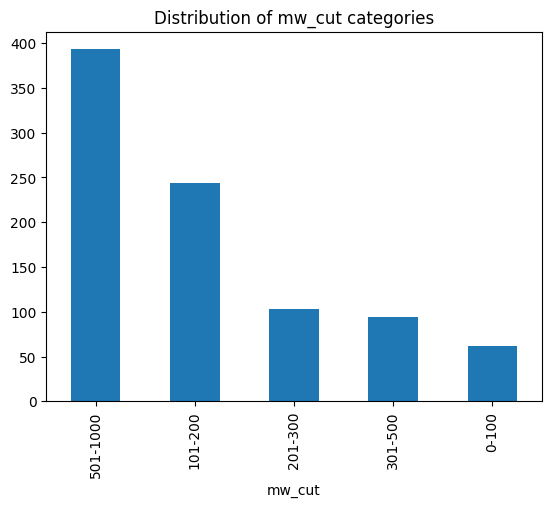

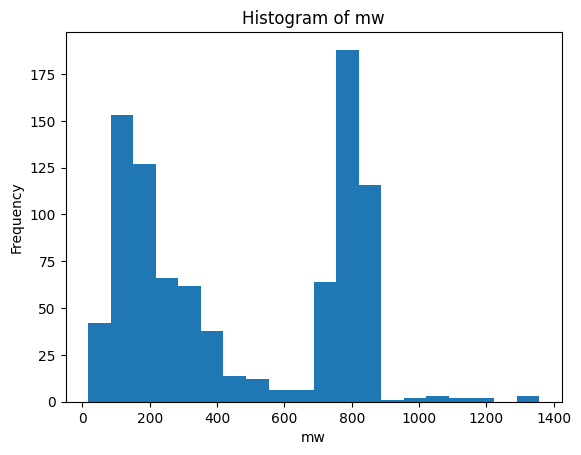

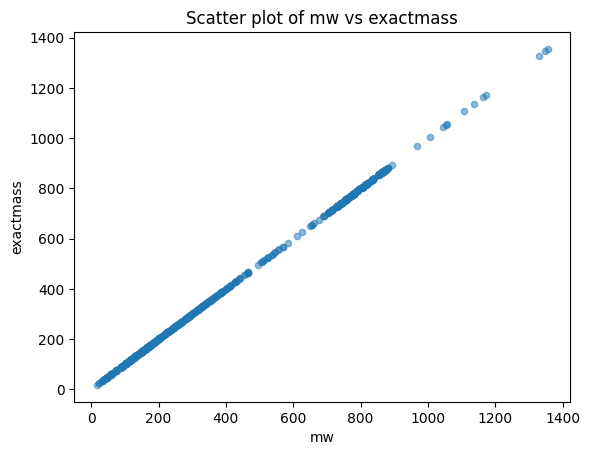

In [32]:
drug_900['mw_cut'].value_counts().plot(kind='bar')
plt.title('Distribution of mw_cut categories')
plt.show()

drug_900['mw'].plot.hist(bins=20)
plt.title('Histogram of mw')
plt.xlabel('mw')
plt.ylabel('Frequency')
plt.show()

drug_900.plot.scatter(x='mw', y='exactmass', alpha=0.5)
plt.title('Scatter plot of mw vs exactmass')
plt.show()

In [33]:
# Chia drug_900 thành 2 phần nhỏ
df_1 = drug_900.iloc[:3].copy()
display(df_1.head(10))
df_2 = drug_900.iloc[6:9].copy()
display(df_2.head(10))

# Concatenate (nối) dataframe
df_concat = pd.concat([df_1, df_2], axis=0)

# Merge (gộp hai bảng dựa trên cột chung 'cid')
df_merge = pd.merge(df_1[['cid', 'cmpdname']], df_2[['cid', 'mw']], on='cid', how='inner')

# Join (gộp hai bảng dựa trên index hoặc cột, ở đây chọn 'cid' làm index cho df_2)
df_join = df_1.join(df_2.set_index('cid'), on='cid', how='inner', lsuffix='_left', rsuffix='_right')

display(df_concat.head(10))
display(df_merge.head(10))
display(df_join.head(10))

,cid,cmpdname,cmpdsynonym,mw,mf,...,annotation,mw_cut,mw_qcut,cid_x2,mw_cut_mapped
0,49,3-Methyl-2-oxobutanoic acid,3-Methyl-2-oxobutanoic acid|759-05-7...,116.11,C5H8O3,...,NaN,101-200,"(17.029999999999998, 163.0]",98,nhẹ vừa
1,51,2-Oxoglutaric acid,2-ketoglutaric acid|2-Oxopentanedioi...,146.10,C5H6O5,...,NaN,101-200,"(17.029999999999998, 163.0]",102,nhẹ vừa
2,66,"2,5-Dichlorophenol","2,5-dichlorophenol|583-78-8|Phenol, ...",163.00,C6H4Cl2O,...,NaN,101-200,"(17.029999999999998, 163.0]",132,nhẹ vừa


,cid,cmpdname,cmpdsynonym,mw,mf,...,annotation,mw_cut,mw_qcut,cid_x2,mw_cut_mapped
6,107,3-Phenylpropionic acid,hydrocinnamic acid|3-phenylpropionic...,150.17,C9H10O2,...,NaN,101-200,"(17.029999999999998, 163.0]",214,nhẹ vừa
7,119,Gamma-Aminobutyric Acid,4-aminobutyric acid|4-Aminobutanoic ...,103.12,C4H9NO2,...,D018377 - Neurotransmitter Agents > ...,101-200,"(17.029999999999998, 163.0]",238,nhẹ vừa
8,126,4-Hydroxybenzaldehyde,4-hydroxybenzaldehyde|p-Hydroxybenza...,122.12,C7H6O2,...,NaN,101-200,"(17.029999999999998, 163.0]",252,nhẹ vừa


,cid,cmpdname,cmpdsynonym,mw,mf,...,annotation,mw_cut,mw_qcut,cid_x2,mw_cut_mapped
0,49,3-Methyl-2-oxobutanoic acid,3-Methyl-2-oxobutanoic acid|759-05-7...,116.11,C5H8O3,...,NaN,101-200,"(17.029999999999998, 163.0]",98,nhẹ vừa
1,51,2-Oxoglutaric acid,2-ketoglutaric acid|2-Oxopentanedioi...,146.10,C5H6O5,...,NaN,101-200,"(17.029999999999998, 163.0]",102,nhẹ vừa
2,66,"2,5-Dichlorophenol","2,5-dichlorophenol|583-78-8|Phenol, ...",163.00,C6H4Cl2O,...,NaN,101-200,"(17.029999999999998, 163.0]",132,nhẹ vừa
6,107,3-Phenylpropionic acid,hydrocinnamic acid|3-phenylpropionic...,150.17,C9H10O2,...,NaN,101-200,"(17.029999999999998, 163.0]",214,nhẹ vừa
7,119,Gamma-Aminobutyric Acid,4-aminobutyric acid|4-Aminobutanoic ...,103.12,C4H9NO2,...,D018377 - Neurotransmitter Agents > ...,101-200,"(17.029999999999998, 163.0]",238,nhẹ vừa
8,126,4-Hydroxybenzaldehyde,4-hydroxybenzaldehyde|p-Hydroxybenza...,122.12,C7H6O2,...,NaN,101-200,"(17.029999999999998, 163.0]",252,nhẹ vừa


,cid,cmpdname,mw


,cid,cmpdname_left,cmpdsynonym_left,mw_left,mf_left,...,annotation_right,mw_cut_right,mw_qcut_right,cid_x2_right,mw_cut_mapped_right


In [34]:
# Thực hiện 4 kiểu join khác nhau giữa df_1 và df_2 dựa trên cột 'cid'
left_join_df = pd.merge(df_1[['cid','cmpdname']], df_2[['cid','mw']], on='cid', how='left') # a / b
right_join_df = pd.merge(df_1[['cid','cmpdname']], df_2[['cid','mw']], on='cid', how='right') # b / a
inner_join_df = pd.merge(df_1[['cid','cmpdname']], df_2[['cid','mw']], on='cid', how='inner') # a & b
full_join_df = pd.merge(df_1[['cid','cmpdname']], df_2[['cid','mw']], on='cid', how='outer') # a | b

display(left_join_df, right_join_df, inner_join_df, full_join_df)

,cid,cmpdname,mw
0,49,3-Methyl-2-oxobutanoic acid,NaN
1,51,2-Oxoglutaric acid,NaN
2,66,"2,5-Dichlorophenol",NaN


,cid,cmpdname,mw
0,107,NaN,150.17
1,119,NaN,103.12
2,126,NaN,122.12


,cid,cmpdname,mw


,cid,cmpdname,mw
0,49,3-Methyl-2-oxobutanoic acid,NaN
1,51,2-Oxoglutaric acid,NaN
2,66,"2,5-Dichlorophenol",NaN
3,107,NaN,150.17
4,119,NaN,103.12
5,126,NaN,122.12


In [35]:
# 1. Xử lý giá trị thiếu
# Loại bỏ các dòng chứa giá trị NaN
drug_900_clean = drug_900.dropna()

# Hoặc điền giá trị thiếu, ví dụ: điền giá trị trung bình cho cột 'mw'
# drug_900['mw'].fillna(drug_900['mw'].mean(), inplace=True)

# 2. Loại bỏ các bản ghi trùng lặp
drug_900_clean = drug_900_clean.drop_duplicates()

# 3. Nhóm và tổng hợp dữ liệu

# Ví dụ: Số lượng hợp chất theo công thức phân tử (mf) và trọng lượng phân tử trung bình
grouped = drug_900_clean.groupby('mf').agg({'cid': 'count', 'mw': 'mean'}).rename(columns={'cid': 'count', 'mw': 'avg_mw'})
print(grouped)

# Sử dụng pivot_table để xem trọng lượng phân tử trung bình theo 'mf' và 'depcatg'
pivot = pd.pivot_table(drug_900_clean, values='mw', index='mf', columns='depcatg', aggfunc='mean')
print(pivot)

             count   avg_mw
mf                         
C10H12N2O        1  176.210
C10H12N4O5       1  268.230
C10H13N5O4       1  267.240
C10H16N2O3S      1  244.310
C10H16N4O3       1  240.260
...            ...      ...
CH4N2O           1   60.056
CH4O             1   32.042
CHCl3            1  119.370
H2O2             1   34.015
I2               1  253.808

[117 rows x 2 columns]
depcatg      Chemical Vendors|Curation Efforts|Governmental Organizations|Journal Publishers|Legacy Depositors|NIH Initiatives|Research and Development|Subscription Services  \
mf                                                                                                                                                                              
C10H12N2O                                    176.210                                                                                                                            
C10H12N4O5                                   268.230                             